Ensemble : basically means taking group of things instead of individual

- Types of Ensemble : 
1. Bagging
2. Random Forest
3. Boosting

- Problem with Decision Tree : High Variance

Bagging: Averaging multiple datasets variance
1. As generally we dont have access to multiple data, use 'Bootstrapping' to map multiple data set
2. While bagging - Pruning is not done, Full length trees are grown
3. Individual trees have high variance and low bias, average reduces the variance
4. In Regression, we take average of predicted values
5. In Classification we take Majority vote i.e most predicted class will be taken as the final prediction


Bagging : Bootstrap Aggregation : Bootstrap + Aggregation
- Reandom Subsampling + Average : Parallel Process

Boosting : Sequential Process : 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = r'D:\MyStudy\ML_DL_Udemy\Machine Learning & Deep Learning in Python & R\Data Files\3. ST Academy - Decision Trees resource files/Movie_classification.csv'


In [3]:
df = pd.read_csv(data_path, header=0)

In [4]:
df['Time_taken'].mean()

157.3914979757085

In [5]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)

In [7]:
X = df.loc[:, df.columns!= "Start_Tech_Oscar"]
y = df["Start_Tech_Oscar"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(404, 20) (102, 20) (404,) (102,)


Start building the bagging model

In [9]:
from sklearn import tree

In [10]:
clftree = tree.DecisionTreeClassifier      # In bagging we grow full tree, so not providing any parameters to control the tree growth
clftree_instance = clftree()

In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
bag_clf = BaggingClassifier(base_estimator=clftree_instance, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [13]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [15]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [16]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

With Bagging our accuracy score has increased
- Problem with Bagging :
Bagging creates Correlated trees.

Random Forest:
We use subset of predictor variables so that we get different splits in each model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [19]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [20]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [21]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

Grid Search : 
provide value of parameters, will get best parameters suited for model

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [24]:
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split" : [2,3,10]}

In [25]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [27]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [28]:
cvrf_clf = grid_search.best_estimator_

In [29]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6274509803921569

In [30]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

Boosting:
1. XG Boost : contains regularization terms in cost function
2. AdaBoost
3. Gradient Boost 

Create Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5784313725490197

Gradient Boosting Classifier with hyperparamete

In [34]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [35]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.7623762376237624

In [36]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

Ada Boost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [39]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [40]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.8886138613861386

In [41]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [42]:
# using random _forest classifier from above as our base estimator here
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate=0.02, n_estimators=500)

In [43]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.02, n_estimators=500)

In [44]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6274509803921569

There is slight increase in the score by changing the base model. Like this we can try out different combinations

We can again used GridSearch to optimze the parameters and get the best suited model.

XG Boost Classifier

In [45]:
import xgboost as xgb

The difference between Gradient boost and XG boost is in regularization part

Parameter Tunning:
1. General Parameters : Guide the overall functioning
2. Booster Parameters : Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters : Guide the optimization performed

In [47]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)

In [48]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

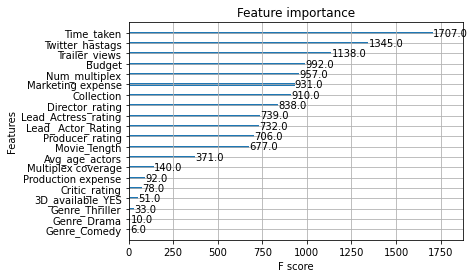

In [50]:
xgb.plot_importance(xgb_clf)

In [51]:
xgb_clf2 = xgb.XGBClassifier(n_estimators=500, learning_rate=0.3, random_state=42)

In [53]:
param_test1 = {
    'max_depth' : range(3, 10, 2),
    'gamma' : [0.1, 0.2, 0.3], 
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9],
    'reg_alpha' : [1e-2, 0.1, 1]
}

In [54]:
grid_search = GridSearchCV(xgb_clf2, param_test1, n_jobs=-1, cv=5, scoring='accuracy')

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [56]:

cvxg_clf = grid_search.best_estimator_

In [57]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6372549019607843

In [58]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.9}